In [152]:
df = pd.read_csv('./project-toyotacorolla-data/train.csv')

# I. EDA

## 1. Data classification

 ###  1) Dependent variable :

In [4]:
y = 'Price'

### 2) Independent variable

#### (1) continuous data :

In [5]:
num_data = ['Age_08_04', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Guarantee_Period', 'Weight'] #'Weight'는 제외

#### (2) discrete data (category data) : 

In [6]:
category_data = ['Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Color', 'Doors',
                          'Cylinders', 'Gears']

#### (3) discrete data (binary data) : 

In [7]:
binary_data = np.array(['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 
                        'Airco', 'Automatic_airco',
                        'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 
                        'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 
                        'Parking_Assistant', 'Tow_Bar'])

In [8]:
len(num_data), len(category_data), len(binary_data)

(7, 7, 22)

## 2. Look into Data

### 1) continuous data (pairplot)

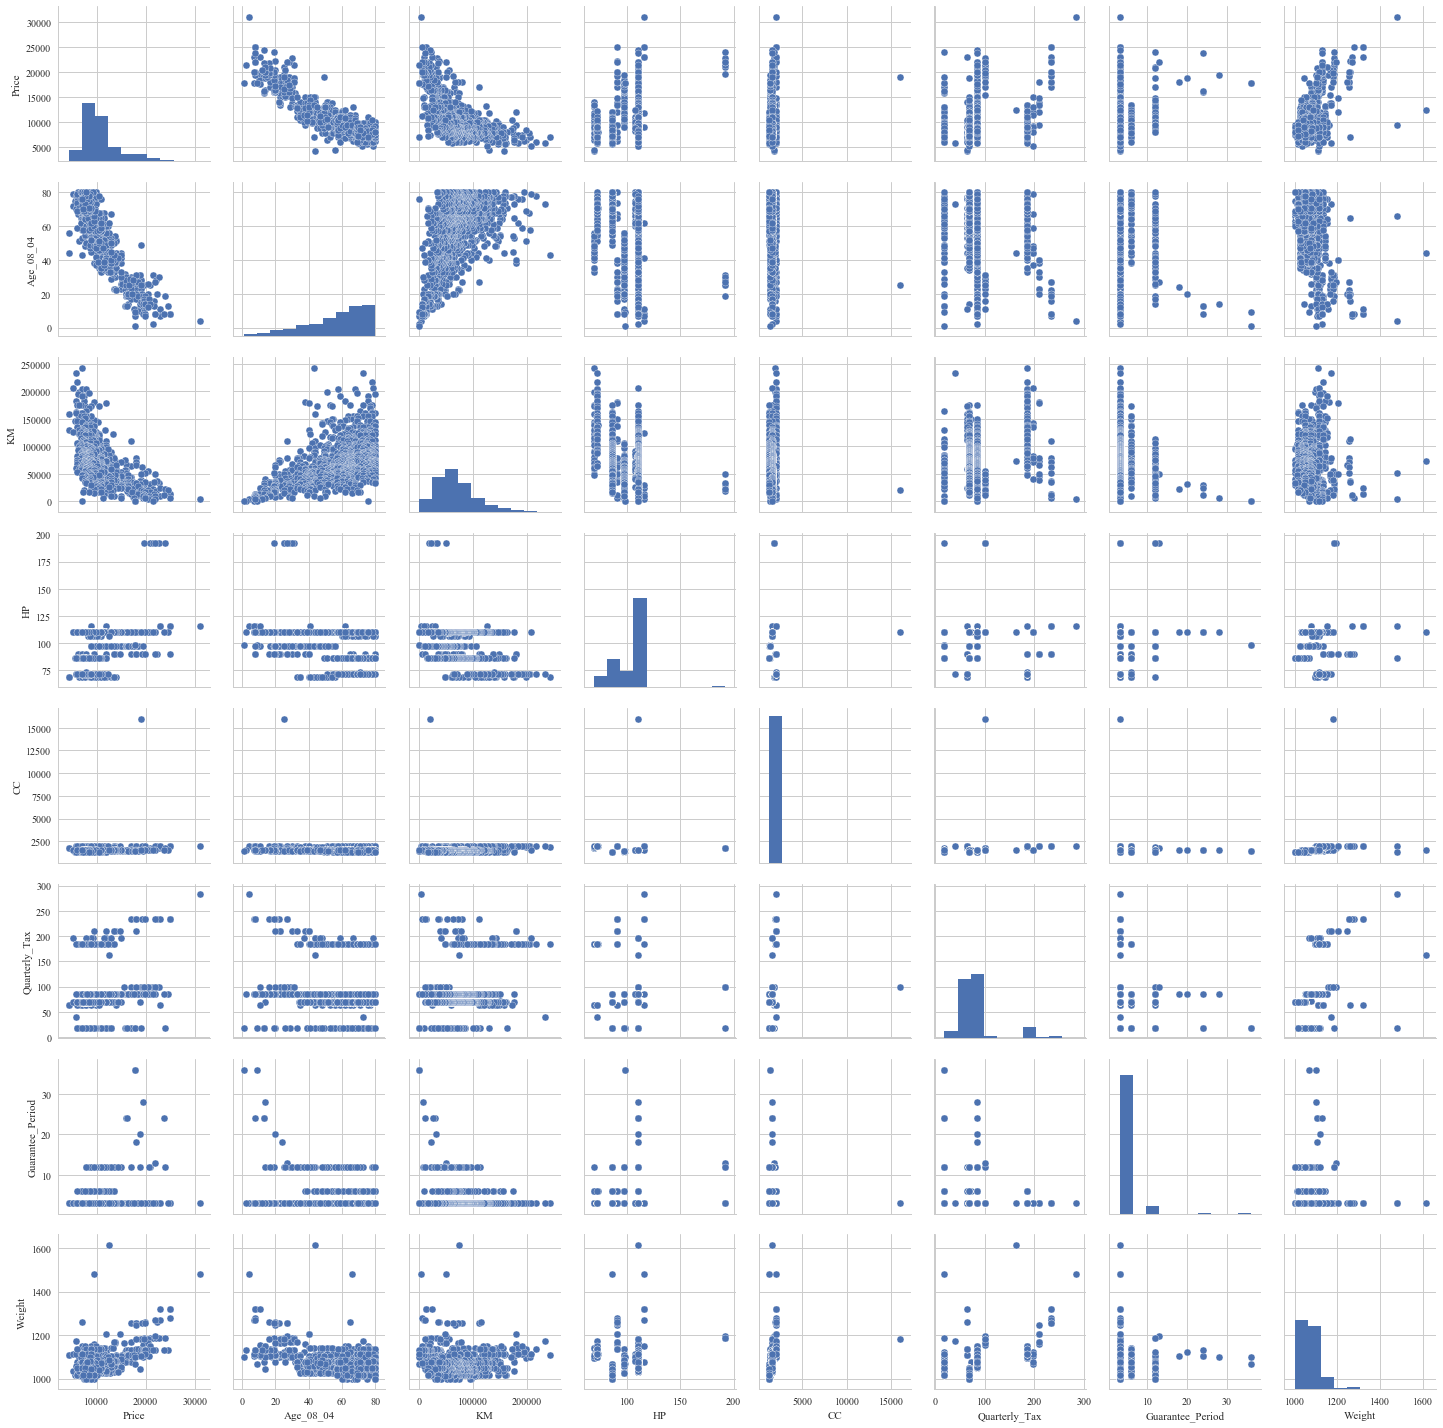

In [9]:
df = pd.read_csv('./project-toyotacorolla-data/train.csv')
df_n = pd.DataFrame(df, columns=num_data)
df_y = df['Price']
df_pair = pd.concat([df_y, df_n], axis=1)
#df_pair['L_t'] = np.log(df_pair['Age_08_04'])
sns.pairplot(df_pair)
# Price - Age_08_04 간의 선형관계가 두드러짐. 
# CC, Guarantee_Periods는 데이터가 특정 구분에 몰려있음. 

### 2) discrete data (boxplot, histogram)

In [77]:
def draw_boxplot(x):
    fig = plt.figure(figsize=(20, 8)) 
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[x], y=df['Price'])
    a = df[x].value_counts()
    plt.subplot(1, 2, 2)
    a.plot(kind="bar")
    return a

1     150
4     105
3     100
2      94
7      93
8      89
6      89
5      88
10     76
9      49
12     43
11     43
Name: Mfg_Month, dtype: int64

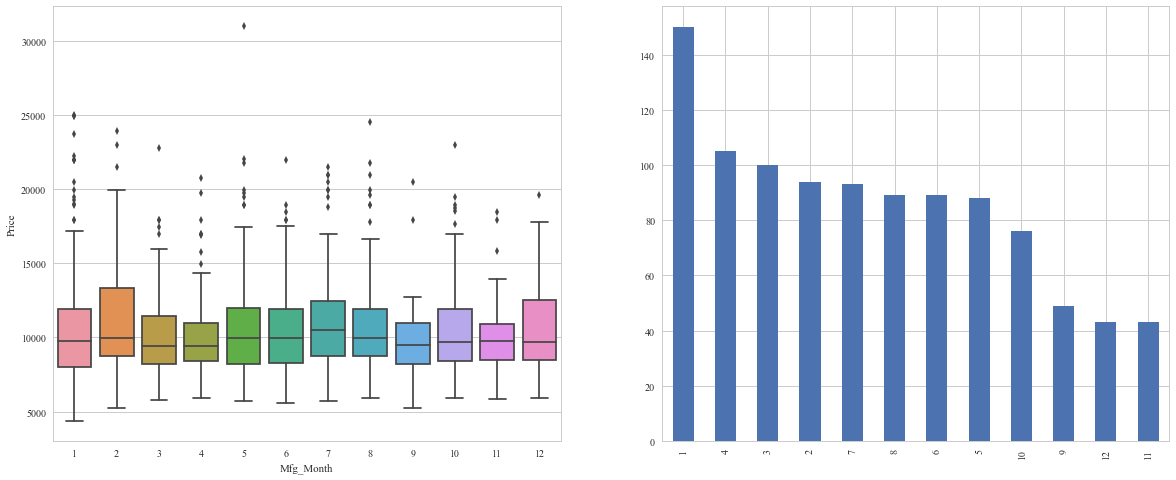

In [78]:
draw_boxplot('Mfg_Month') # 변수 선택 시 기각! 생산 월별 차이가 없음. 

1999    316
1998    280
2000    155
2001    134
2003     60
2002     59
2004     15
Name: Mfg_Year, dtype: int64

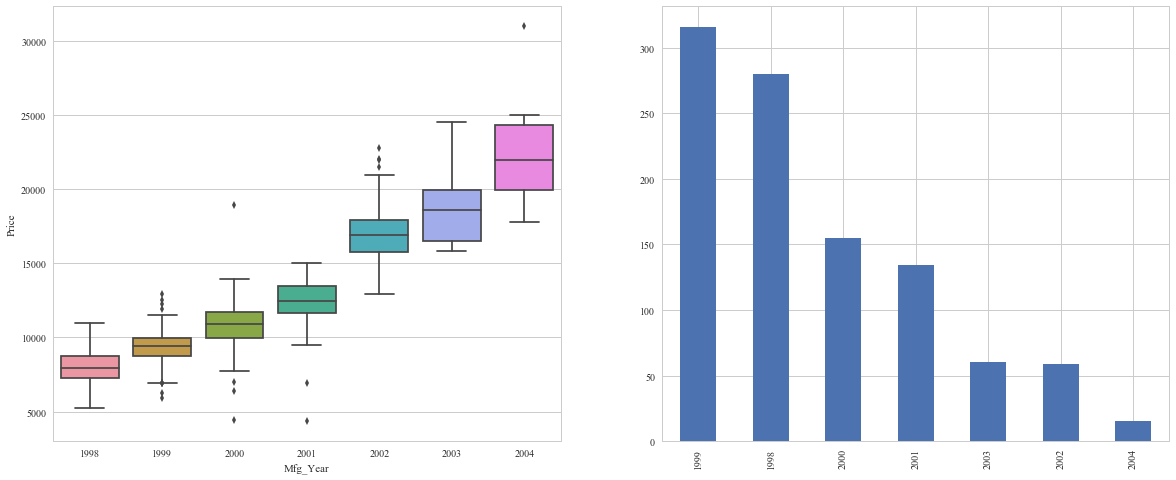

In [82]:
draw_boxplot('Mfg_Year') # 변수 선택 시 기각! 생산 월별 차이가 없음. (age_08_04 변수와 차이가 없음.)

Petrol    904
Diesel    106
CNG         9
Name: Fuel_Type, dtype: int64

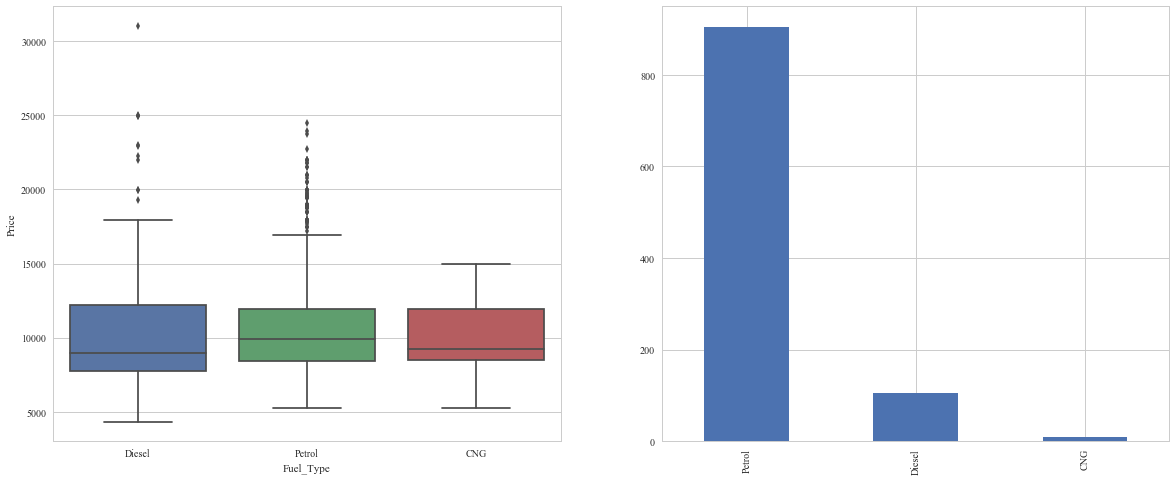

In [148]:
draw_boxplot('Fuel_Type') #표본의 갯수가 차이가 심함. Petrol 인지 아닌지가 중요한것으로 보임. 

Grey      207
Red       207
Blue      206
Green     149
Black     132
Silver     90
White      21
Beige       3
Violet      2
Yellow      2
Name: Color, dtype: int64

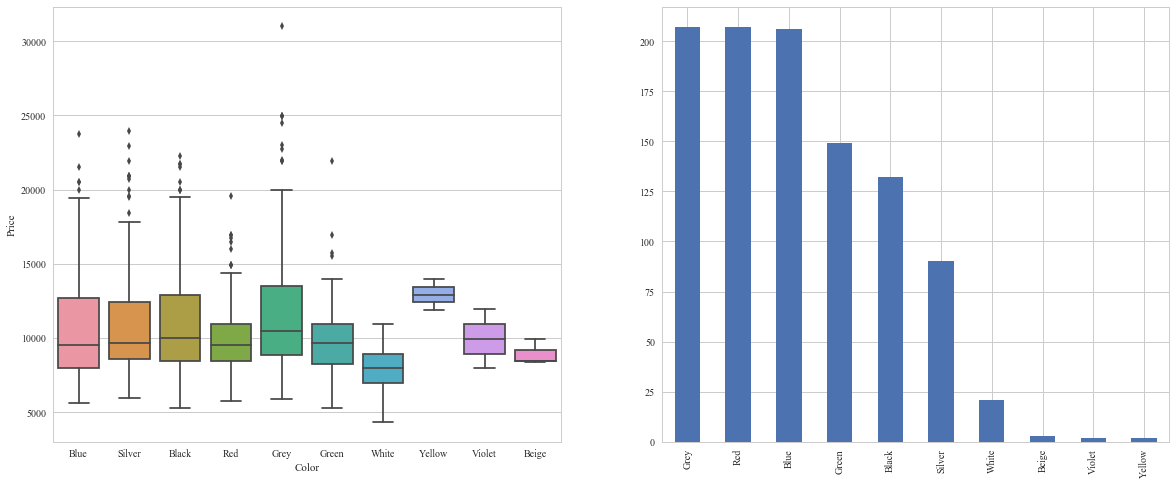

In [84]:
draw_boxplot('Color') #변수 선택 시 가각! 색깔별 가격차이가 별로 없고, 평균값이 높은 노란색은 표본의 수가 작음. 

5    486
3    439
4     93
2      1
Name: Doors, dtype: int64

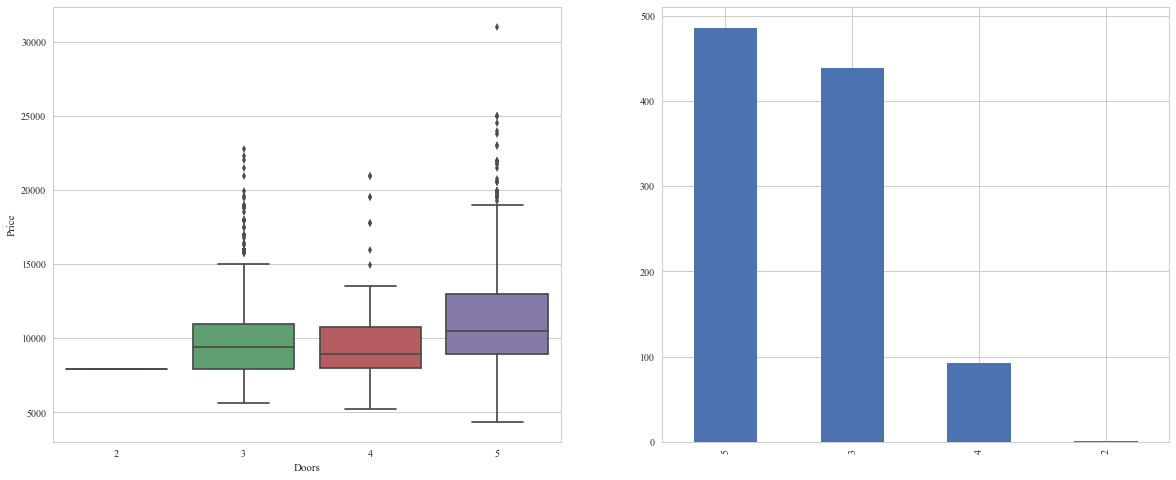

In [86]:
draw_boxplot('Doors') # 가격과 어느정도 상관관계가 있어보임. 사용가능

4    1019
Name: Cylinders, dtype: int64

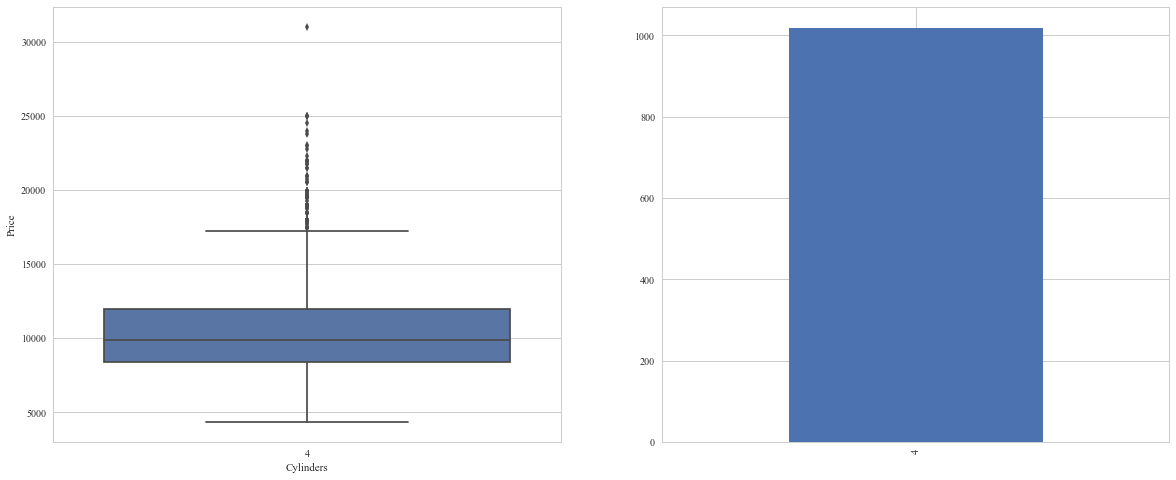

In [87]:
draw_boxplot('Cylinders') #기각! 모든 샘플의 값이 동일함.

5    990
6     29
Name: Gears, dtype: int64

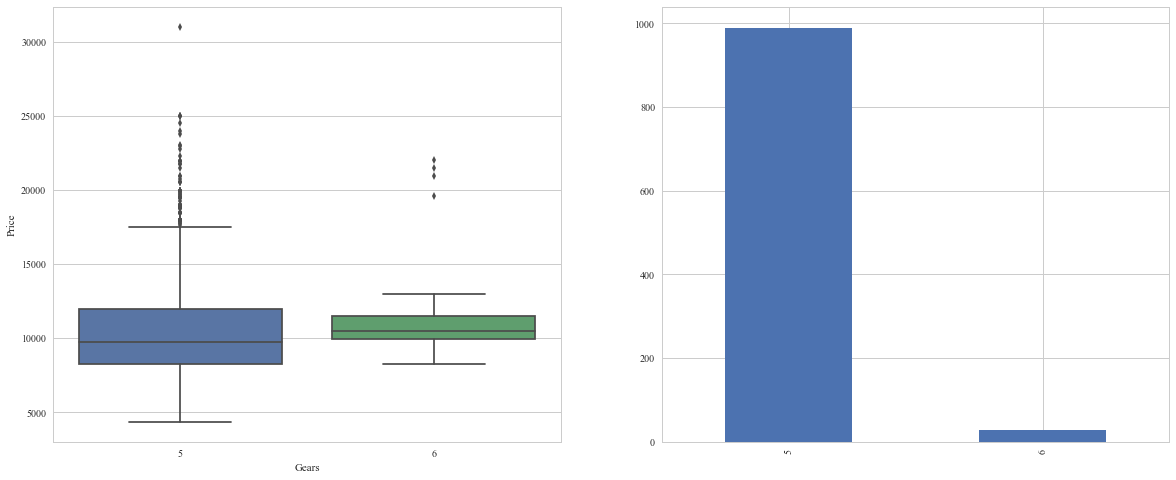

In [91]:
draw_boxplot('Gears') #기각! boxplot 모습이 가격과 별다른 상관관계가 없어보임...

1    682
0    337
Name: Met_Color, dtype: int64

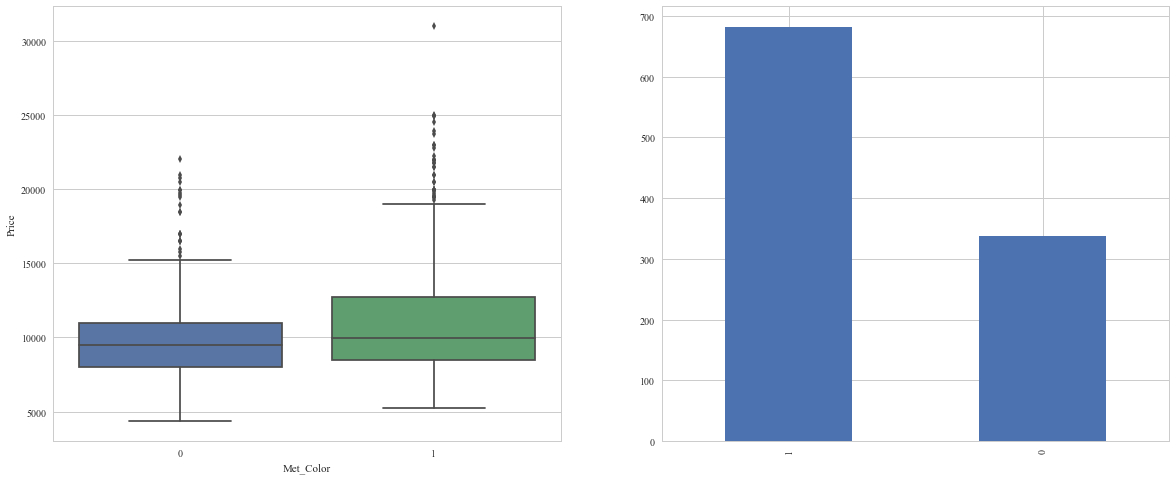

In [92]:
draw_boxplot('Met_Color')

0    961
1     58
Name: Automatic, dtype: int64

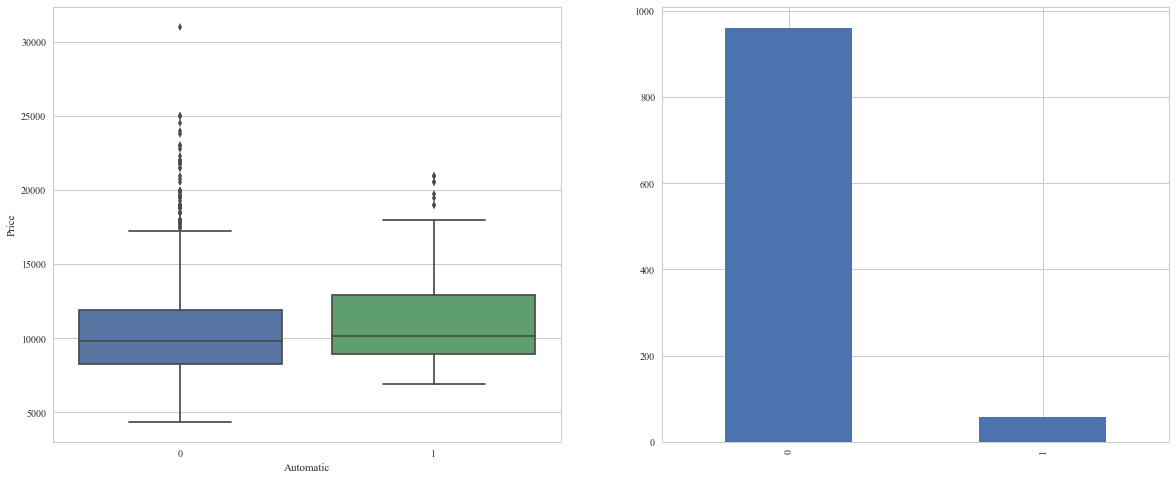

In [96]:
draw_boxplot('Automatic')

0    608
1    411
Name: Mfr_Guarantee, dtype: int64

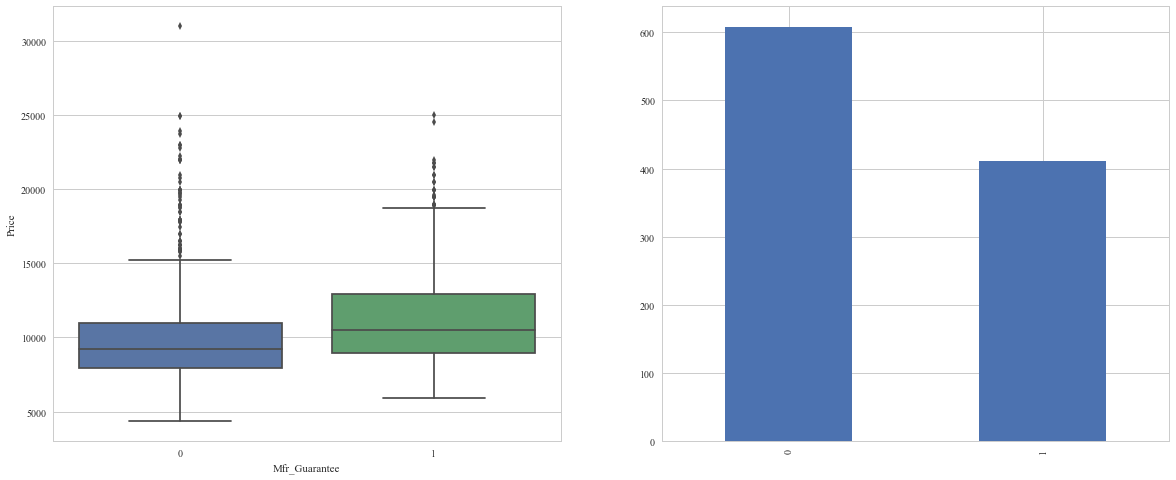

In [97]:
draw_boxplot('Mfr_Guarantee')

1    904
0    115
Name: BOVAG_Guarantee, dtype: int64

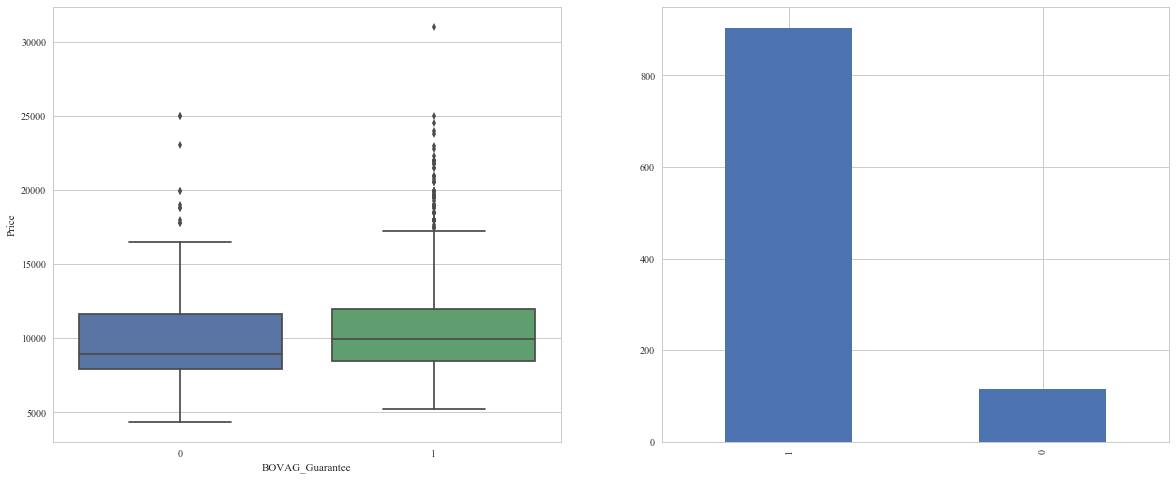

In [98]:
draw_boxplot('BOVAG_Guarantee')

1    829
0    190
Name: ABS, dtype: int64

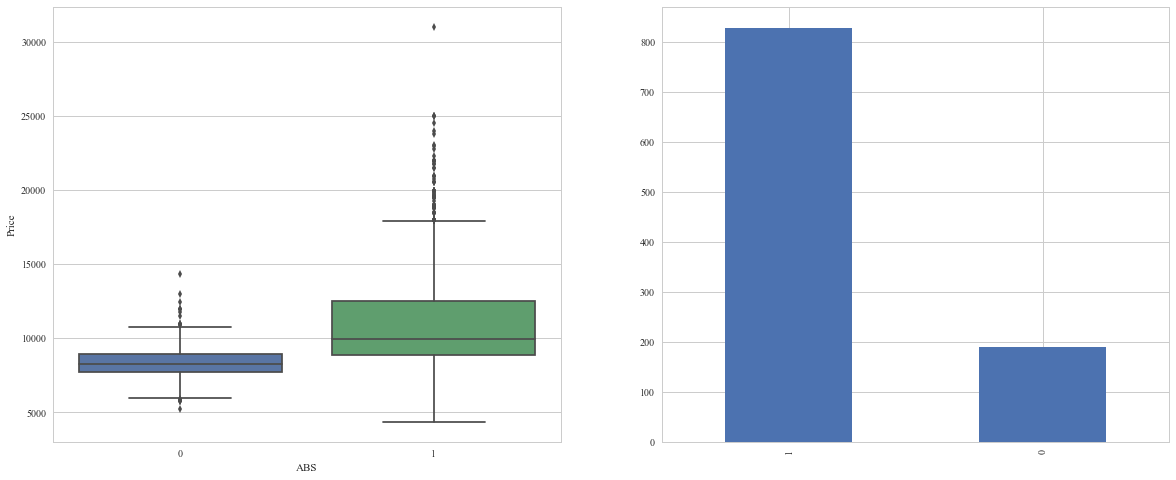

In [99]:
draw_boxplot('ABS')

1    988
0     31
Name: Airbag_1, dtype: int64

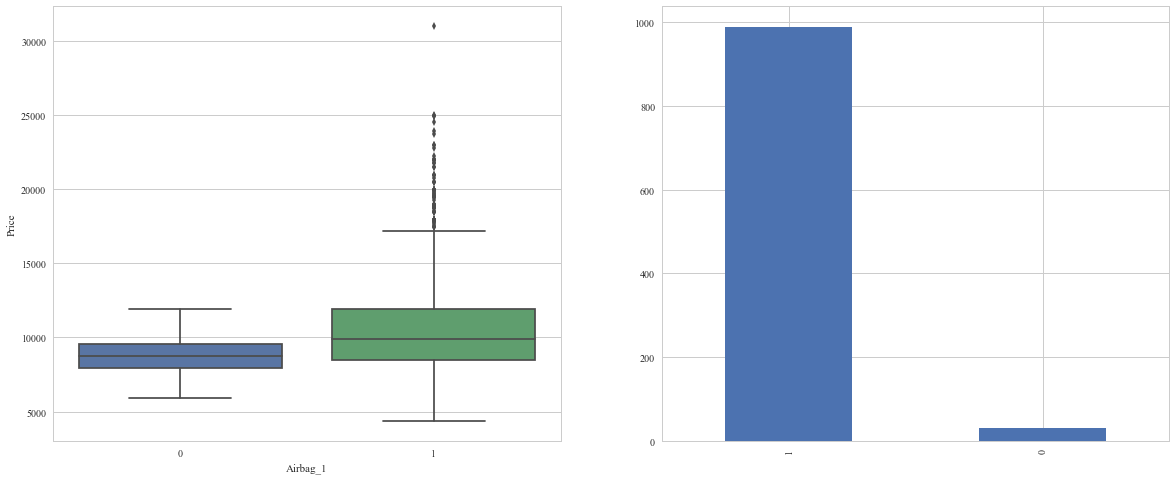

In [106]:
draw_boxplot('Airbag_1') #없는 데이터 모수가 작고, 가격에 대한 플러스요인으로는 보이지 않음.

1    731
0    288
Name: Airbag_2, dtype: int64

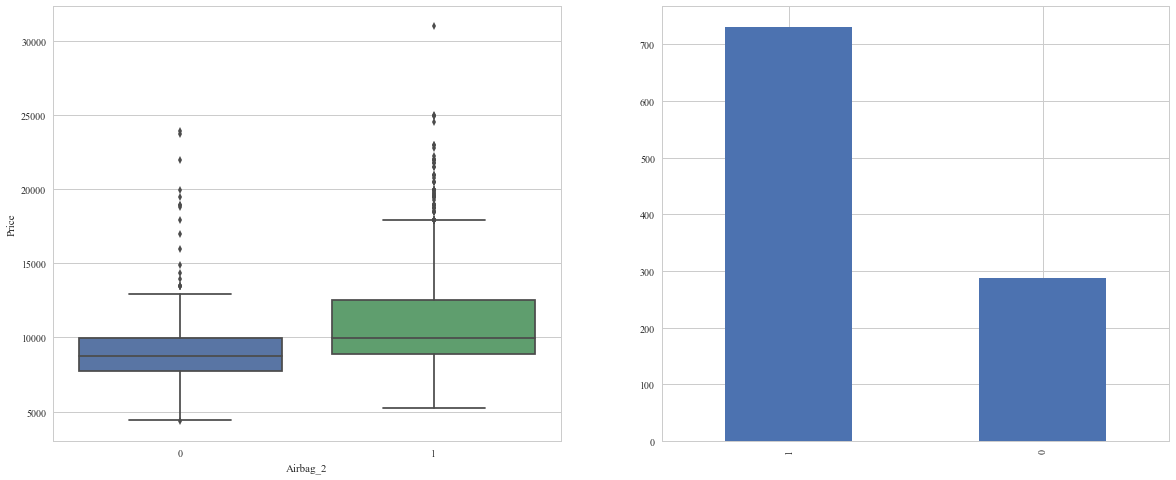

In [101]:
draw_boxplot('Airbag_2')

1    514
0    505
Name: Airco, dtype: int64

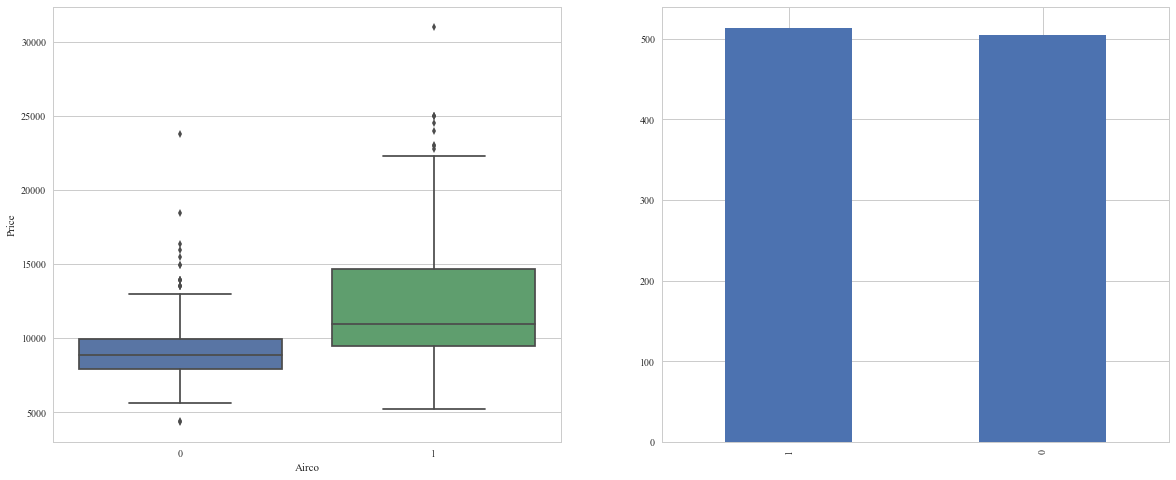

In [104]:
draw_boxplot('Airco')

0    958
1     61
Name: Automatic_airco, dtype: int64

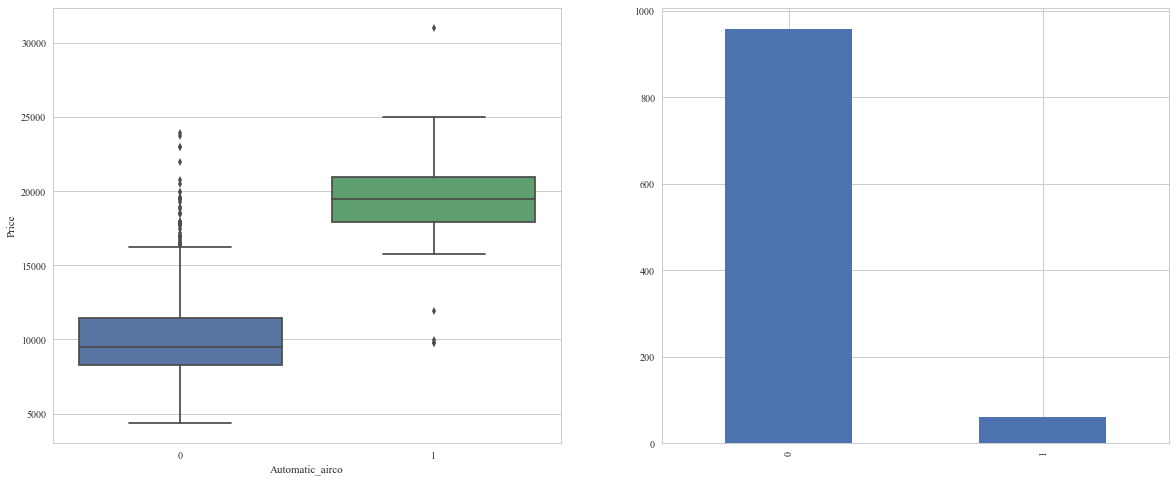

In [108]:
draw_boxplot('Automatic_airco') #있는 차량의 가격평균이 그렇지 않은 차량에 비해 상당히 높음. 

0    730
1    289
Name: Boardcomputer, dtype: int64

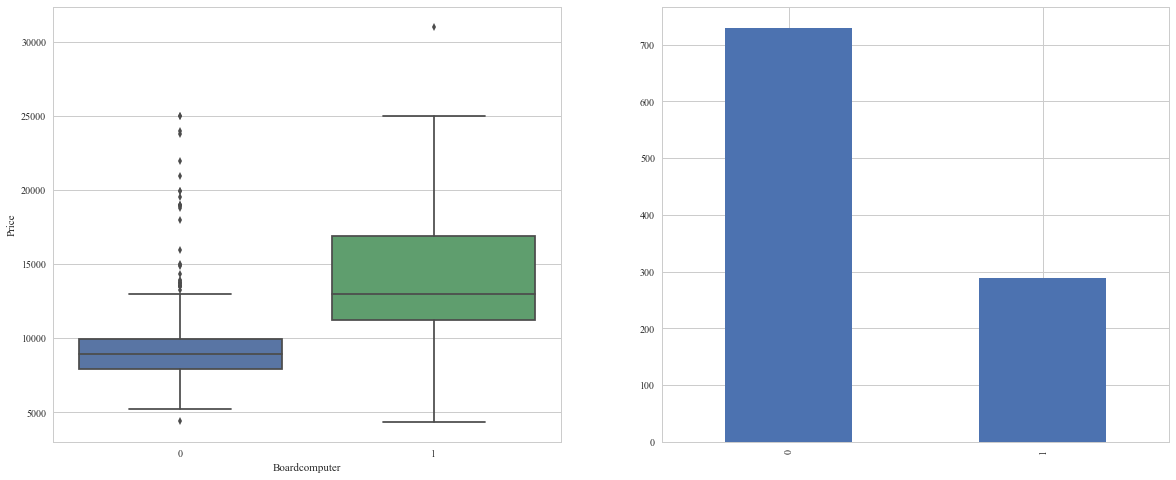

In [111]:
draw_boxplot('Boardcomputer') #유의미해보이지만 없는 데이터에 대한 boxplot에서 상위 아웃라이어가 다수 보임.(없는데도 비싼차들..)

0    788
1    231
Name: CD_Player, dtype: int64

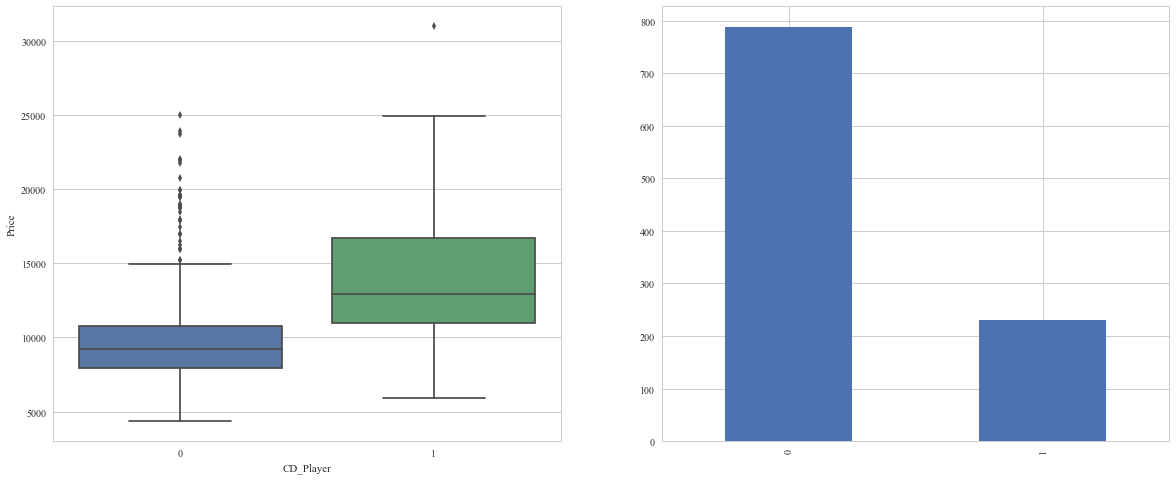

In [114]:
draw_boxplot('CD_Player') #의미있어보임, 있는차들이 비쌈.

1    597
0    422
Name: Central_Lock, dtype: int64

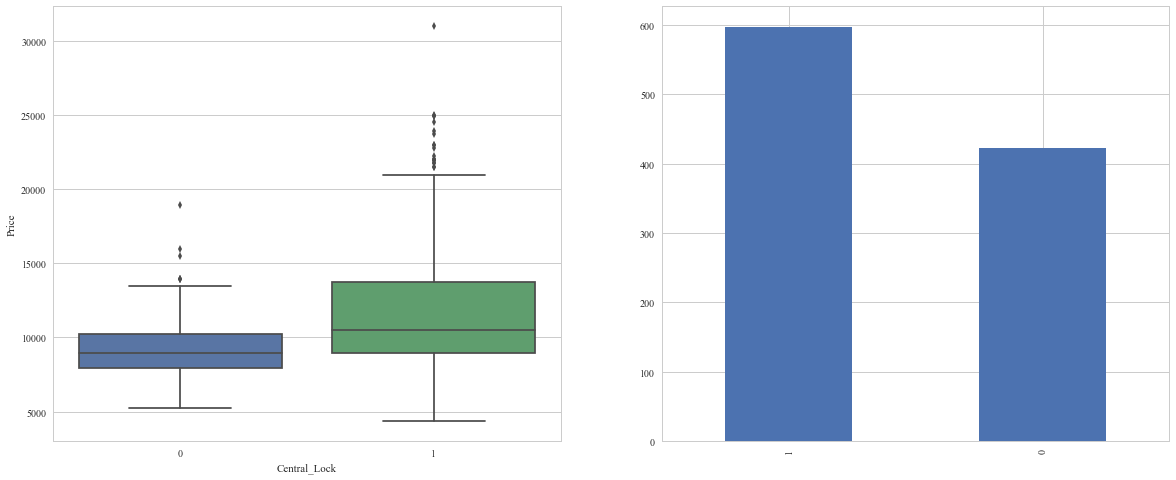

In [118]:
draw_boxplot('Central_Lock') #의미있어보임, 있는차들이 비쌈.

1    578
0    441
Name: Powered_Windows, dtype: int64

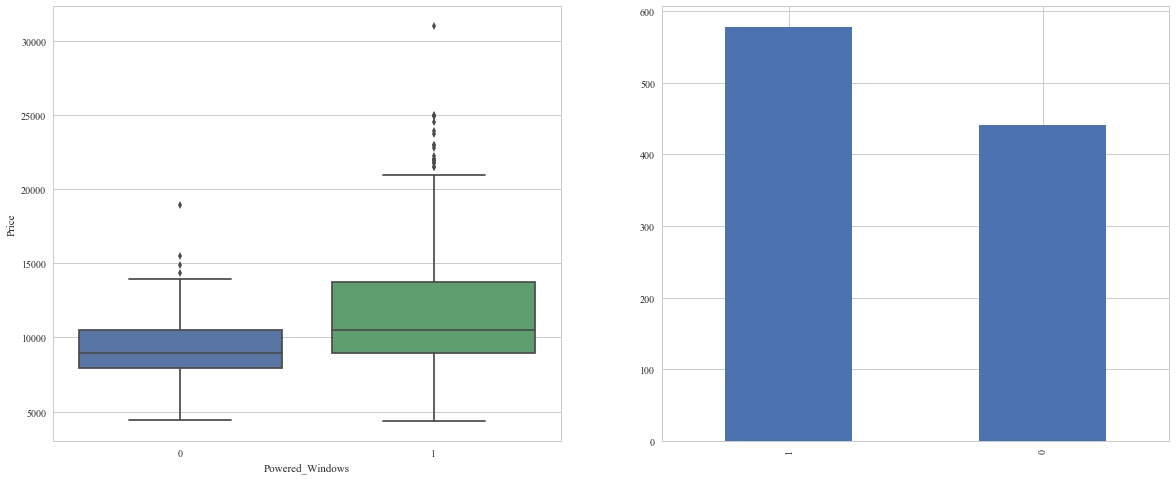

In [119]:
draw_boxplot('Powered_Windows') #Central_Lock과 비슷..

1    993
0     26
Name: Power_Steering, dtype: int64

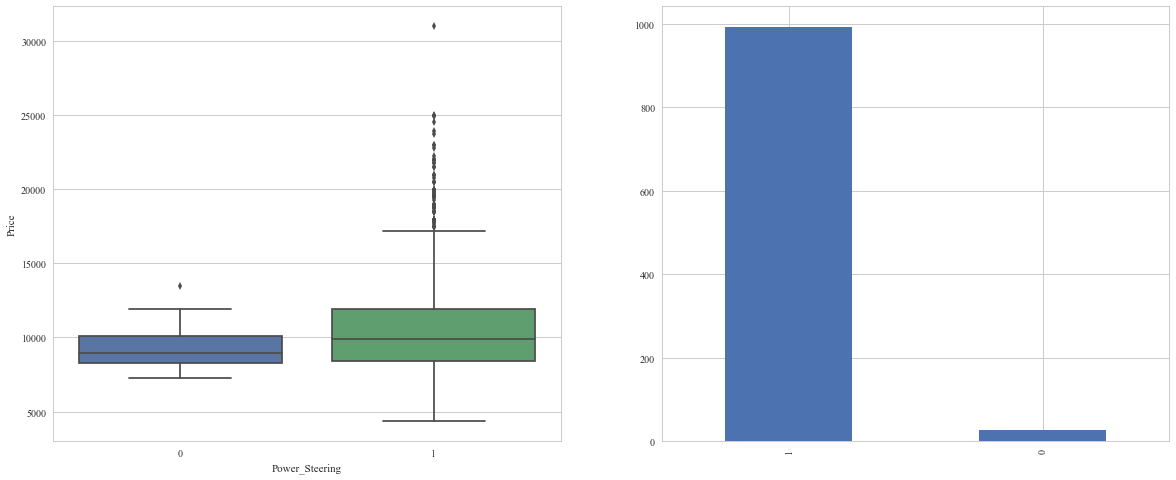

In [121]:
draw_boxplot('Power_Steering') #기각! 없는 차의 표본이 작고, 가격차도 유의미해보이지 않음. 

0    874
1    145
Name: Radio, dtype: int64

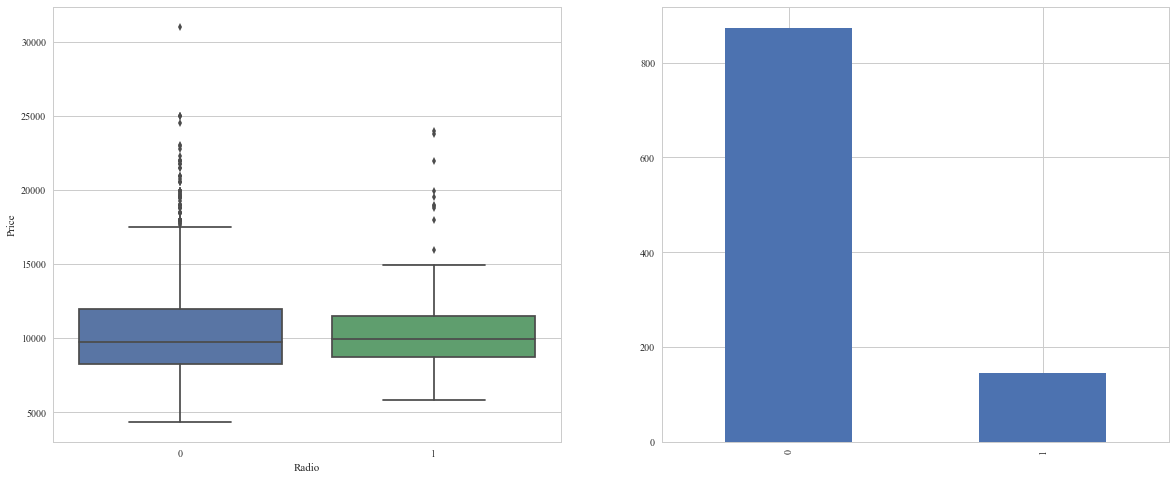

In [123]:
draw_boxplot('Radio') #기각! 2004년인데..라디오있다고 비쌀리가... 역시...

0    753
1    266
Name: Mistlamps, dtype: int64

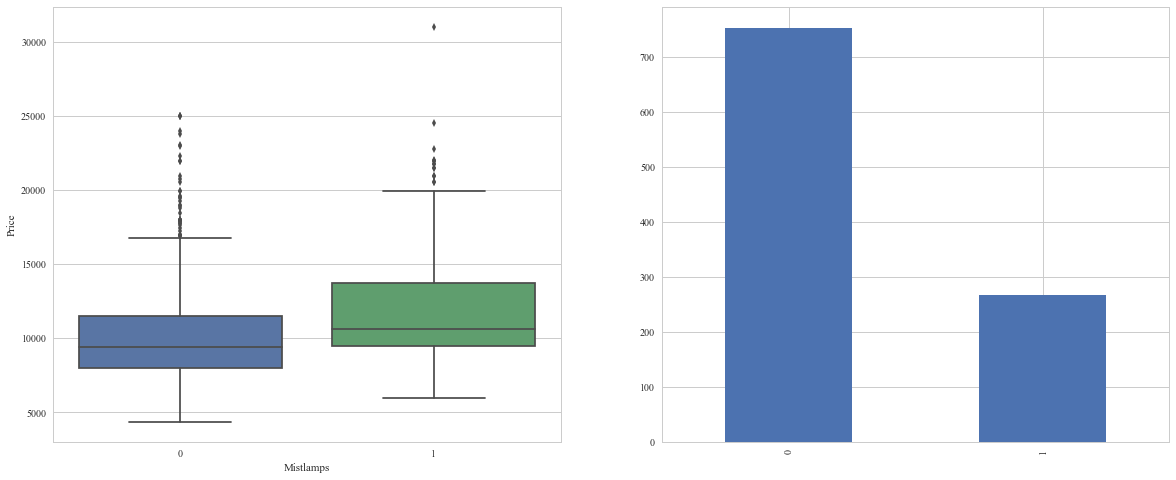

In [125]:
draw_boxplot('Mistlamps') #의미있어 보임

0    701
1    318
Name: Sport_Model, dtype: int64

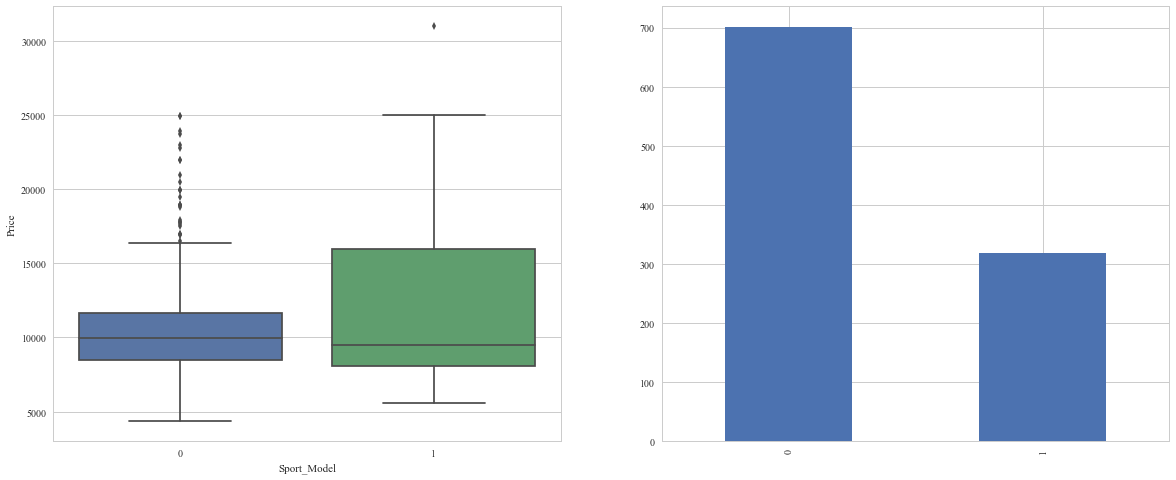

In [129]:
draw_boxplot('Sport_Model') #스포츠 모델의 경우 상위 50%의 가격이 높음.하지만 중위수는 오히려 스포츠 모델이 아닌쪽이 높음. 상관관계 확인필요.

1    786
0    233
Name: Backseat_Divider, dtype: int64

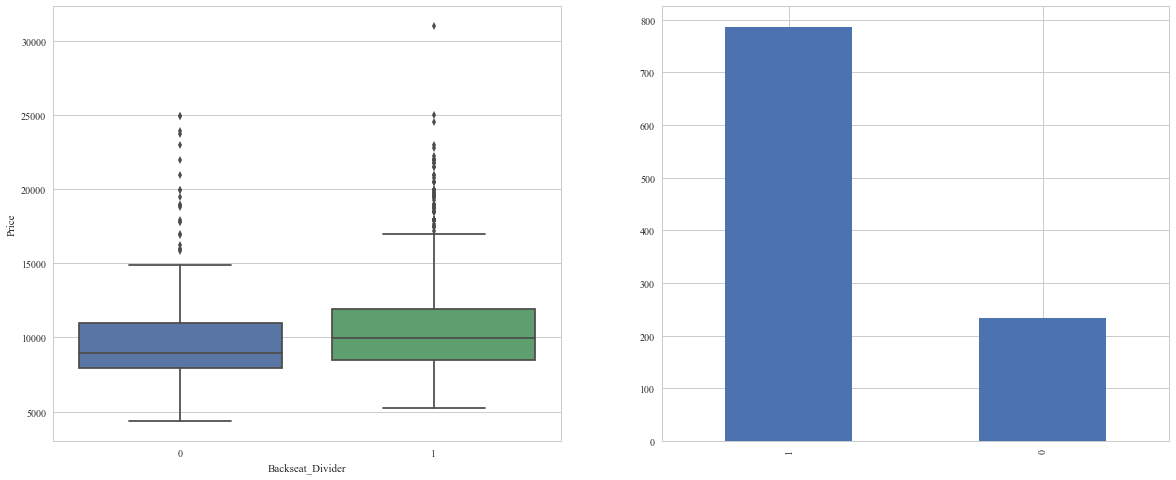

In [130]:
draw_boxplot('Backseat_Divider')

0    819
1    200
Name: Metallic_Rim, dtype: int64

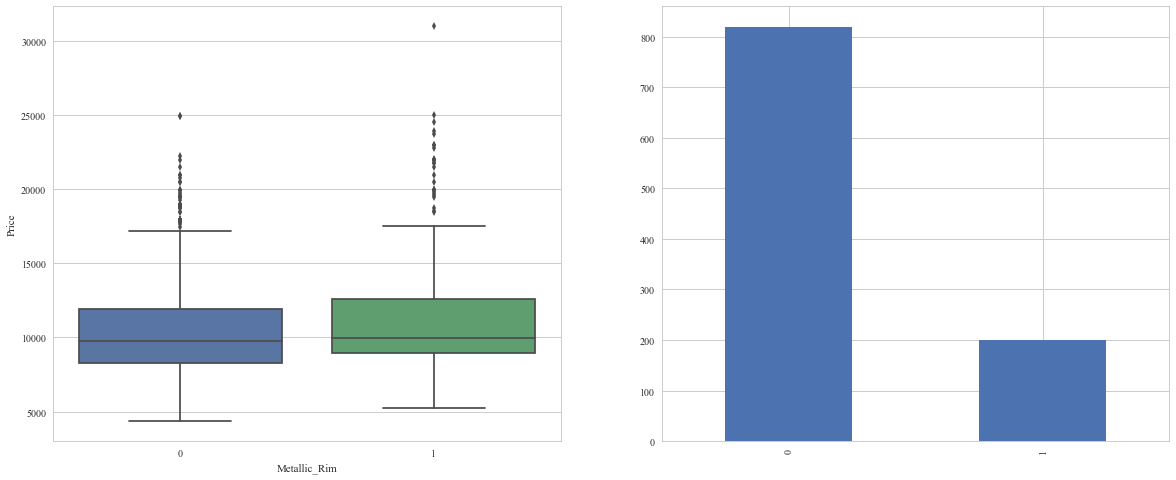

In [131]:
draw_boxplot('Metallic_Rim')

0    874
1    145
Name: Radio_cassette, dtype: int64

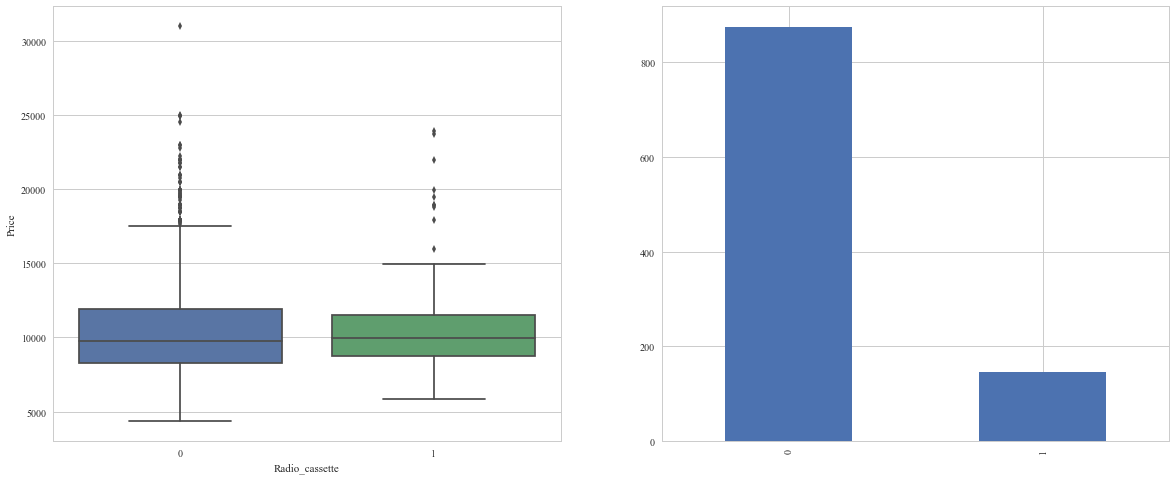

In [133]:
draw_boxplot('Radio_cassette') #라디오카세트.. 역시...

0    1016
1       3
Name: Parking_Assistant, dtype: int64

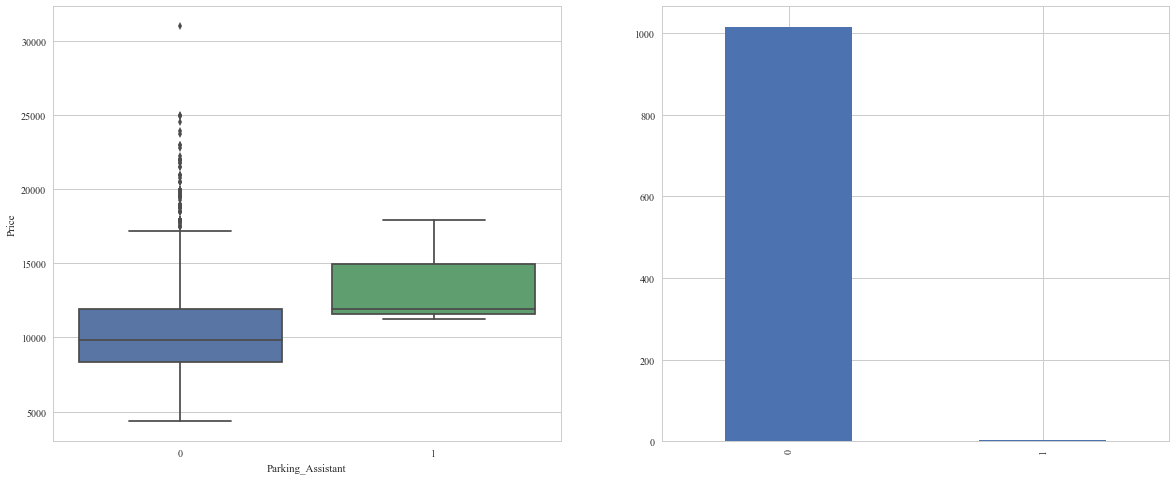

In [136]:
draw_boxplot('Parking_Assistant') #기각! 표본이 너무 작고 있는차량도 없는 차량에 비해 평균적으로 가격이 높지만, 없는 차량중에도 휠씬 비싼차가 많음...

0    735
1    284
Name: Tow_Bar, dtype: int64

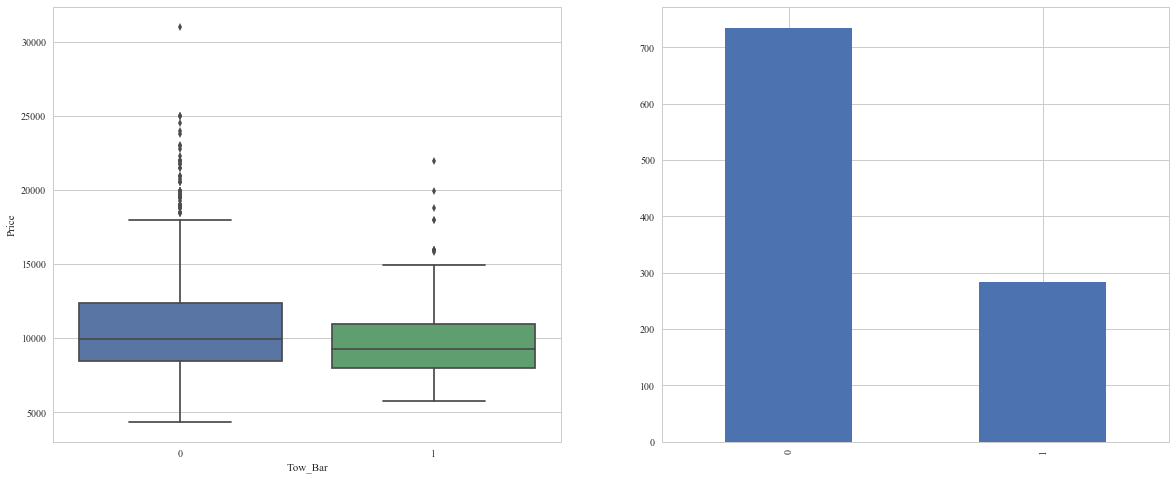

In [144]:
draw_boxplot('Tow_Bar') #이건 가격의 플러스 요소는 아닌듯...

### 분석결과 
- Mfg_Month, Mfg_Year, Color, Cylinders, Radio, Radio_cassette, Parking_Assistant는 쓸모가 없을듯.
- Fuel_Type은 Petrol인지 아닌지 0,1로 변환

## 3. 상관관계 분석

### 0) 상관관계 분석용 데이터 프레임 생성

In [204]:
df = pd.read_csv('./project-toyotacorolla-data/train.csv')
df_cor = df.copy()
del_list = ['Mfg_Month', 'Mfg_Year', 'Color', 'Cylinders', 'Radio', 'Radio_cassette',
            'Parking_Assistant']
#앞선 EDA분석에 따른 삭제항목 제거 
for i in del_list:
    del df_cor[i]
#상관관계 분석 불필요 항목 제거
del df_cor['Id']
del df_cor['Model']
#Fuel_Type 변수 대체 
df_cor["Petrol"] = np.where(df_cor["Fuel_Type"].str.contains('Petrol'), 1, 0)
del df_cor['Fuel_Type']
df_cor

,Price,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Gears,Quarterly_Tax,...,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar,Petrol
0,13500,23,46986,90,1,0,2000,3,5,210,...,0,1,1,1,0,0,1,0,0,0
1,13750,23,72937,90,1,0,2000,3,5,210,...,1,1,0,1,0,0,1,0,0,0
2,13750,30,38500,90,0,0,2000,3,5,210,...,0,1,1,1,1,0,1,0,0,0
3,20950,25,31461,192,0,0,1800,3,6,100,...,1,1,1,1,0,0,0,1,0,1
4,19600,25,32189,192,0,0,1800,3,6,100,...,0,1,1,1,1,1,1,1,0,1
5,21500,31,23000,192,1,0,1800,3,6,100,...,1,1,1,1,1,1,1,1,0,1
6,22000,28,18739,192,0,0,1800,3,6,100,...,0,1,1,1,1,1,1,1,0,1
7,22750,30,34000,192,1,0,1800,3,5,100,...,1,1,1,1,1,0,1,1,0,1
8,17950,24,21716,110,1,0,1600,3,5,85,...,0,1,1,1,0,0,0,0,1,1
9,16950,30,64359,110,1,0,1600,3,5,85,...,1,1,1,1,0,1,1,0,0,1


### 1) 상관관계 분석

In [162]:
total_cor = df_cor.corr()
total_cor

,Price,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Gears,Quarterly_Tax,...,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar,Petrol
Price,1.000000,-0.883900,-0.575962,0.314898,0.152843,0.068063,0.120415,0.180798,0.053457,0.178874,...,0.493033,0.361207,0.363009,0.064949,0.227719,0.166143,0.081085,0.136991,-0.156850,-0.011480
Age_08_04,-0.883900,1.000000,0.516486,-0.164049,-0.140035,-0.001682,-0.092059,-0.146533,0.005648,-0.172089,...,-0.513276,-0.285107,-0.283574,-0.071222,-0.140741,-0.113049,-0.094117,-0.059525,0.168490,0.069967
KM,-0.575962,0.516486,1.000000,-0.350617,-0.088607,-0.107495,0.083882,0.004097,-0.003265,0.289799,...,-0.273181,-0.135009,-0.159295,0.007386,-0.076192,-0.030932,-0.031270,0.005221,0.076030,-0.453562
HP,0.314898,-0.164049,-0.350617,1.000000,0.078019,0.031521,0.032090,0.066610,0.210127,-0.324570,...,0.127317,0.285779,0.292959,0.086382,0.216489,-0.022977,0.017965,0.222818,0.068116,0.519601
Met_Color,0.152843,-0.140035,-0.088607,0.078019,1.000000,-0.034378,0.040116,0.091594,-0.005133,0.027395,...,0.206230,0.179711,0.169049,0.111136,0.042604,0.000755,0.044419,0.069026,0.153169,-0.000213
Automatic,0.068063,-0.001682,-0.107495,0.031521,-0.034378,1.000000,0.098632,-0.046902,-0.016574,-0.039976,...,-0.001499,0.017367,0.009413,-0.013971,0.027579,0.035652,0.022814,-0.068079,0.007890,0.087623
CC,0.120415,-0.092059,0.083882,0.032090,0.040116,0.098632,1.000000,0.079255,0.009573,0.265723,...,0.067242,0.067538,0.049752,0.040415,0.007394,-0.032570,-0.060084,0.012024,-0.000379,-0.267659
Doors,0.180798,-0.146533,0.004097,0.066610,0.091594,-0.046902,0.079255,1.000000,-0.174992,0.128078,...,0.092887,0.120391,0.084052,0.059692,0.047446,-0.100023,-0.026240,-0.038423,0.092843,-0.061527
Gears,0.053457,0.005648,-0.003265,0.210127,-0.005133,-0.016574,0.009573,-0.174992,1.000000,-0.011840,...,-0.064475,0.143897,0.149498,0.027694,0.234214,0.164950,0.036974,0.301766,-0.027411,0.061044
Quarterly_Tax,0.178874,-0.172089,0.289799,-0.324570,0.027395,-0.039976,0.265723,0.128078,-0.011840,1.000000,...,0.090297,0.026088,-0.018782,0.046060,0.010484,0.081636,0.212349,-0.001137,0.012093,-0.828705


In [174]:
total_list = list(df_cor.columns)

for i in total_list:
    df_cor2 = total_cor[abs(total_cor[i]) > 0.3][i]
    print('<{}>'.format(i))
    print(df_cor2)
    print()

#역시 Price와 Age_08_04와의 상관관계가 월등히 높음. 
#그렇다면 Age_08_04를 중심 특징 변수로 지정하고 추가적인 변수 셀렉션을 진행하자!
#Price와 상관관계가 존재하면서도 Age_08_04와 상관관계가 낮은것을 추가 선택해보자. 

<Price>
Price              1.000000
Age_08_04         -0.883900
KM                -0.575962
HP                 0.314898
Weight             0.557015
ABS                0.304380
Airco              0.444310
Automatic_airco    0.595089
Boardcomputer      0.604629
CD_Player          0.493033
Central_Lock       0.361207
Powered_Windows    0.363009
Name: Price, dtype: float64

<Age_08_04>
Price             -0.883900
Age_08_04          1.000000
KM                 0.516486
Weight            -0.463990
ABS               -0.412789
Airbag_2          -0.329166
Airco             -0.423356
Automatic_airco   -0.452331
Boardcomputer     -0.711661
CD_Player         -0.513276
Name: Age_08_04, dtype: float64

<KM>
Price           -0.575962
Age_08_04        0.516486
KM               1.000000
HP              -0.350617
Boardcomputer   -0.370030
Petrol          -0.453562
Name: KM, dtype: float64

<HP>
Price            0.314898
KM              -0.350617
HP               1.000000
Quarterly_Tax   -0.324570
Petrol

### 소소한 발견사항
- 트레이닝 데이터가 정확히는 아니지만 생산년도가 높은 차량 순으로 정렬되어있다. (신차 > 오래된차)
- 또한 테스트 데이터는 트레이닝 데이터에서 중간중간 데이터를 뺴서 만들어진 subset 이다. 
- 추후 교차 검정 데이터셋을 만들때 균등 분할하는것보다 랜덤하게 테스트데이터를 추출하는것이 바람직할것 같음. 

# II. 분석 목표 설정 

## 1) OLS Regression Results를 활용한 초기 성능확인
- 전체 특징변수 중 삭제가 확실한 일부 변수를 제외하고 스케일링만 적용한 상태에서 확인 

In [221]:
#거의 전체 모수를 다 넣은 모델 (스케일링 까지만 한 모델임) 
#제외변수 : Mfg_Month, Mfg_Year, Color, Cylinders 
#Fuel_Type 대신 Petrol 사용
df = pd.read_csv('./project-toyotacorolla-data/train.csv')
df["Petrol"] = np.where(df["Fuel_Type"].str.contains('Petrol'), 1, 0)
model = sm.OLS.from_formula("Price ~ "
                           'scale(Age_08_04)+scale(KM) + scale(HP) + scale(Met_Color) + scale(Automatic) + scale(Doors) + scale(Gears) + scale(Quarterly_Tax) + scale(Weight) + scale(Mfr_Guarantee) + scale(BOVAG_Guarantee) + scale(Guarantee_Period) + scale(ABS) + scale(Airbag_1) + scale(Airbag_2) + scale(Airco) + scale(Automatic_airco) + scale(Boardcomputer) + scale(CD_Player) + scale(Central_Lock) +scale(Powered_Windows) +scale(Power_Steering) + scale(Mistlamps) + scale(Sport_Model) + scale(Radio_cassette) +scale(Radio) +scale(Backseat_Divider) + scale(Metallic_Rim) + scale(Parking_Assistant) + scale(CC) + scale(Tow_Bar)+ scale(Petrol)',
                           data = df)
result = model.fit()
#dfy = result.predict(dfX)
print(result.summary())

#목표
#독립변수의 수를 줄여나감에도 R-square 0.9를 최대한 사수하자!
#각 독립변수에 대한 단일계수 t-검정 결과 p-value 0 (구간에 따라 부호가 바뀌는 변수는 지양)
#독립변수 갯수 최대 10개
#Cond. No. 25.7에서 줄이기

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     276.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:29:56   Log-Likelihood:                -8622.4
No. Observations:                1019   AIC:                         1.731e+04
Df Residuals:                     986   BIC:                         1.747e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## 2) VIF를 확인을 통한 독립변수간 상관관계 점검

In [206]:
df = pd.read_csv('./project-toyotacorolla-data/train.csv')
dfX = df.iloc[:,3:]
del dfX['Color']
del dfX['Mfg_Month']
del dfX['Mfg_Year'] 
del dfX['Fuel_Type'] #'petrol 대체
del dfX['Cylinders']
#다중공선성 확인 (VIF 확인)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif 
#목표
#VIF 5이상 변수는 발생하지 않도록 체크
#특히 중요변수인 Age_08_04에 대한 VIF Factor를 낮추도록 하자.

,VIF Factor,features
0,43.102518,Age_08_04
1,8.150814,KM
2,77.119998,HP
3,3.526831,Met_Color
4,1.155434,Automatic
5,23.689011,Doors
6,617.540355,Gears
7,12.822284,Quarterly_Tax
8,691.198942,Weight
9,2.033305,Mfr_Guarantee


## 3) 잔차 정규성 검증

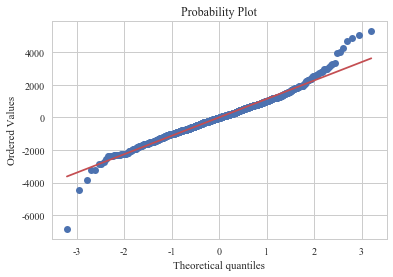

Chi^2       : 78.060
P-value     :  0.000


In [198]:
#잔차 분포
sp.stats.probplot(result.resid, plot=plt)
plt.show()
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

#목표
#최대한 그림을 이쁘게 만들어보자 가능하면 P-Value를 유의미한 수준으로 만들어보자.

## 4) 교차 검증 결과 비교 대상

In [220]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

#교차 검증을 위한 X, y 데이터 set 생성
dfX = pd.read_csv('./project-toyotacorolla-data/train.csv')
dfX['Petrol'] = np.where(dfX['Fuel_Type'].str.contains('Petrol'), 1, 0)
del dfX['Color']
del dfX['Mfg_Month']
del dfX['Mfg_Year'] 
del dfX['Fuel_Type'] #'petrol 대체
del dfX['Cylinders']
dfX = dfX.iloc[:, 3:]
dfX_s = preprocessing.scale(dfX)
y =  pd.DataFrame(df, columns=['Price'])
dfX = pd.DataFrame(dfX_s)

#Random cross validation(난수 시드값을 주지 않은 것)
model = LinearRegression()
num = 10000
#num은 몇 회 실시할지
scores = np.zeros(num)
#test_size가 test data 비율, random_state 값이 난수시드
for i in range (num):
    X_train, X_test, y_train, y_test = train_test_split(dfX, y, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #테스트하다보니 엄청나게 RMS값이 엄청나게 커지는 케이스가 발생함. RMS값이 10000이넘는 케이스는 제외하여 목표치를 정함 
    if sqrt(mean_squared_error(y_test, y_pred)) < 10000: 
        scores[i] = sqrt(mean_squared_error(y_test, y_pred))
scores
print(np.mean(scores))
print(np.std(scores))

#목표 : 동일한 방식으로 테스트하여 아래의 결과를 만족
#교차검증 RMS 평균 : 1382.61075705 미만
#교차검증 RMS 표준편차 : 340.361908982 미만


1383.16290115
343.60467525


# III. 변수 & 모델 확정

## 1) OLS Result 확인

In [226]:
df_new = pd.read_csv('./project-toyotacorolla-data/train.csv')
#df.insert(2, 'Lprice', np.log(df['Price'])) 추후 질문사항!!!
df_new['D4D'] = np.where(df_new['Model'].str.contains("2.0 D4D"), 1, 0)
df_new['VVTL'] = np.where(df_new['Model'].str.contains("VVTL"), 1, 0)
df_new['EXEC'] = np.where(df_new['Model'].str.contains("EXEC"), 1, 0)
df_new['Usage'] = np.log(df_new.Age_08_04 + df_new.KM / 7000)
df_new['Brand_new'] = np.where(df_new['Usage'] < 1, 1, 0)
df_new['New'] = np.where((df_new['Usage'] < 3) & (df_new['Usage'] >= 1), 1, 0)
df_new['Petrol'] = np.where(df_new['Fuel_Type'].str.contains('Petrol'), 1, 0)

model_new = sm.OLS.from_formula("Price ~ "
                           'scale(Usage) + scale(Petrol) + scale(HP) + scale(Central_Lock)+ scale(Automatic_airco) + scale(CD_Player) + scale(Brand_new) + scale(New) + scale(D4D) + scale(VVTL)',
                           data = df)
result_new = model_new.fit()
print(result_new.summary())

#목표 달성여부 확인
#독립변수의 수를 줄여나감에도 R-square 0.9를 최대한 사수하자! > 0.891
#각 독립변수에 대한 단일계수 t-검정 결과 p-value 0 (구간에 따라 부호가 바뀌는 변수는 지양) > 달성
#독립변수 갯수 최대 10개 > 달성
#Cond. No. 25.7에서 줄이기 > 3.39

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     838.6
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:42:24   Log-Likelihood:                -8656.6
No. Observations:                1019   AIC:                         1.734e+04
Df Residuals:                    1008   BIC:                         1.739e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.07

## 2) VIF 확인

In [271]:
#최종 데이터 셋 (트레이닝 데이터)
dfX = pd.read_csv('./project-toyotacorolla-data/train.csv')
dfX_new = pd.DataFrame()
dfX_new['Usage'] = np.log(dfX.Age_08_04 + dfX.KM / 7000)
dfX_new['Petrol'] = np.where(dfX['Fuel_Type'].str.contains('Petrol'), 1, 0)
dfX_new['HP'] = dfX['HP']
dfX_new['Central_Lock'] = dfX['Central_Lock']
dfX_new['CD_Player'] = dfX['CD_Player']
dfX_new['Automatic_airco'] = dfX['Automatic_airco']
#dfX['Mfr_Guarantee'] = df2['Mfr_Guarantee']
dfX_new['Brand_new'] = np.where(dfX_new.Usage < 1, 1, 0)
dfX_new['New'] = np.where((dfX_new.Usage < 3) & (dfX_new.Usage >=1), 1, 0)
dfX_new['D4D'] = np.where(dfX['Model'].str.contains("2.0 D4D"), 1, 0)
#dfX['EXEC'] = np.where(df2['Model'].str.contains("EXEC"), 1, 0)
dfX_new['VVTL'] = np.where(dfX['Model'].str.contains("VVTL"), 1, 0)
dfX_new = sm.add_constant(dfX_new)
#print(np.where(dfX.D4D == 1)[0])
#print(np.where(dfX_new.Brand_new==1)[0])
#print(np.where(dfX_new.New==1)[0])
#dfX


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX_new.values, i) for i in range(dfX_new.shape[1])]
vif["features"] = dfX_new.columns
vif 
#목표
#VIF 5이상 변수는 발생하지 않도록 체크 > 달성
#특히 중요변수인 Age_08_04에 대한 VIF Factor를 낮추도록 하자. > 트레이닝 데이터 기준 3.11

,VIF Factor,features
0,309.836851,const
1,3.110692,Usage
2,1.935342,Petrol
3,2.389930,HP
4,1.191367,Central_Lock
5,1.351949,CD_Player
6,1.438452,Automatic_airco
7,1.294601,Brand_new
8,1.974163,New
9,1.364737,D4D


## 3) 잔차정규성 확인

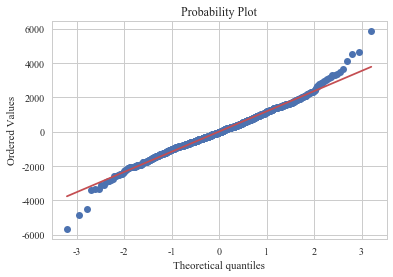

Chi^2       : 44.365
P-value     :  0.000


In [237]:
#잔차 분포
sp.stats.probplot(result_new.resid, plot=plt)
plt.show()
test = sms.omni_normtest(result_new.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

#목표
#최대한 그림을 이쁘게 만들어보자 가능하면 P-Value를 유의미한 수준으로 만들어보자.> 실패!!!

## 4) 교차 검증 결과 비교

In [247]:
from sklearn import preprocessing
#최종 데이터 셋 
dfX = pd.read_csv('./project-toyotacorolla-data/train.csv')
dfX_new_c = pd.DataFrame()
dfX_new_c['Usage'] = np.log(dfX.Age_08_04 + dfX.KM / 7000)
dfX_new_c['Petrol'] = np.where(dfX['Fuel_Type'].str.contains('Petrol'), 1, 0)
dfX_new_c['HP'] = dfX['HP']
dfX_new_c['Central_Lock'] = dfX['Central_Lock']
dfX_new_c['CD_Player'] = dfX['CD_Player']
dfX_new_c['Automatic_airco'] = dfX['Automatic_airco']
#dfX['Mfr_Guarantee'] = df2['Mfr_Guarantee']
dfX_new_c['Brand_new'] = np.where(dfX_new_c.Usage < 1, 1, 0)
dfX_new_c['New'] = np.where((dfX_new_c.Usage < 3) & (dfX_new_c.Usage >=1), 1, 0)
dfX_new_c['D4D'] = np.where(dfX['Model'].str.contains("2.0 D4D"), 1, 0)
#dfX['EXEC'] = np.where(df2['Model'].str.contains("EXEC"), 1, 0)
dfX_new_c['VVTL'] = np.where(dfX['Model'].str.contains("VVTL"), 1, 0)
#dfX_new = sm.add_constant(dfX_new)

#for i in range(len(dfX.columns)):
dfX_s = preprocessing.scale(dfX_new_c)
    
#print(np.where(dfX.D4D == 1)[0])
#print(np.where(dfX.Brand_new==1)[0])
#print(np.where(dfX.New==1)[0])
y = pd.DataFrame(dfX, columns=['Price'])
dfX_new_c = pd.DataFrame(dfX_s)


#Random cross validation(난수 시드값을 주지 않은 것)
model = LinearRegression()
num = 10000
#num은 몇 회 실시할지
scores2 = np.zeros(num)
#test_size가 test data 비율, random_state 값이 난수시드
for i in range (num):
    X_train, X_test, y_train, y_test = train_test_split(dfX_new_c, y, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #테스트하다보니 엄청나게 RMS값이 엄청나게 커지는 케이스가 발생함. RMS값이 10000이넘는 케이스는 제외하여 목표치를 정함 
    #>본 결과에서는 RMS값이 10000이 넘는 케이스가 발생하지 않아 아래 로직 제거함.
    #if sqrt(mean_squared_error(y_test, y_pred)) < 10000: 
    scores2[i] = sqrt(mean_squared_error(y_test, y_pred))
scores
print(np.mean(scores2))
print(np.std(scores2))

#목표 : 동일한 방식으로 테스트하여 아래의 결과를 만족
#교차검증 RMS 평균 : 1382.61075705 미만 > 달성
#교차검증 RMS 표준편차 : 340.361908982 미만 > 달성, 이부분이 의미가 있는듯. 


1274.07109674
177.654444546


#### 전체 트레이닝 데이터에 대한 예측 결과

In [266]:
df_y = pd.read_csv('./project-toyotacorolla-data/train.csv')
df_y = df_y['Price']
print(np.sqrt(sum(result_new.resid ** 2)/len(dfX_new)))
print(np.sqrt(sum((np.log(df_y) - np.log(result_new.predict(dfX_new))) ** 2) / len(df_y)))

1183.55122381
0.116231337127


# IV. 결과 예측

In [272]:
#데이터 셋 (실전 테스트 데이터)
dfX = pd.read_csv('./project-toyotacorolla-data/test.csv')
dfX_new_t = pd.DataFrame()
dfX_new_t['Usage'] = np.log(dfX.Age_08_04 + dfX.KM / 7000)
dfX_new_t['Petrol'] = np.where(dfX['Fuel_Type'].str.contains('Petrol'), 1, 0)
dfX_new_t['HP'] = dfX['HP']
dfX_new_t['Central_Lock'] = dfX['Central_Lock']
dfX_new_t['CD_Player'] = dfX['CD_Player']
dfX_new_t['Automatic_airco'] = dfX['Automatic_airco']
#dfX['Mfr_Guarantee'] = df2['Mfr_Guarantee']
dfX_new_t['Brand_new'] = np.where(dfX_new_t.Usage < 1, 1, 0)
dfX_new_t['New'] = np.where((dfX_new_t.Usage < 3) & (dfX_new_t.Usage >=1), 1, 0)
dfX_new_t['D4D'] = np.where(dfX['Model'].str.contains("2.0 D4D"), 1, 0)
#dfX['EXEC'] = np.where(df2['Model'].str.contains("EXEC"), 1, 0)
dfX_new_t['VVTL'] = np.where(dfX['Model'].str.contains("VVTL"), 1, 0)
dfX_new_t = sm.add_constant(dfX_new_t)
result_new.predict(dfX_new_t)

0      16294.527399
1      15706.090185
2      14867.613691
3      14898.721730
4      15217.823750
5      17239.695411
6      13936.927146
7      22779.308693
8      21446.973995
9      18512.624042
10     17446.593737
11     16768.615001
12     16103.683580
13     15911.251283
14     14347.034168
15     15595.099765
16     18093.854281
17     20513.796620
18     16985.291312
19     16029.985603
20     16267.390582
21     20736.985562
22     13719.370527
23     15575.020859
24     17582.053919
25     14804.212904
26     15347.950185
27     15482.222907
28     20771.535756
29     21617.733758
           ...     
387     8126.630110
388     8657.634172
389     8362.859890
390     8680.503475
391     9060.074920
392    10720.056143
393     8779.003822
394     7941.543704
395     8387.965928
396     8154.626106
397     7793.359383
398     8803.085970
399     8582.416427
400     8689.483812
401     8874.165780
402     8254.424310
403     8102.921226
404     7974.137280
405     8839.068343


# 회고
- 종속변수에 대한 로그처리는 과연 필요했던걸까...